<a href="https://colab.research.google.com/github/Nihavk28/cnn-image-classification/blob/main/Electric_Vehicle_Market_Anaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ELECTRIC VEHICLE MARKET ANALYSIS

Market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. In this project, market analysis is done for Electric Vehicles.An EV is a vehicle that can be powered by an electric motor that draws electricity from a battery and is capable of being charged from an external souce .

Here, certain factors like EV Adoption Time,Model and Make Popularity, etc will be analysed.

**IMPORTING NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import numpy as np

In [2]:

df=pd.read_csv('/content/drive/MyDrive/datasets/Electric_Vehicle_Population_Data.csv')

df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


**DATA CLEANING**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
df.isnull().sum()

,0
VIN (1-10),0
County,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [6]:
df=df.dropna()

In [7]:
df.shape

(177473, 17)

In [8]:
df.dtypes

,0
VIN (1-10),object
County,object
City,object
State,object
Postal Code,float64
Model Year,int64
Make,object
Model,object
Electric Vehicle Type,object
Clean Alternative Fuel Vehicle (CAFV) Eligibility,object


In [9]:
df.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


**DATA ANALYSIS**

<ipython-input-10-6c2288c6e1e5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=adoption_by_model_year.index, y=adoption_by_model_year.values, palette='rocket')


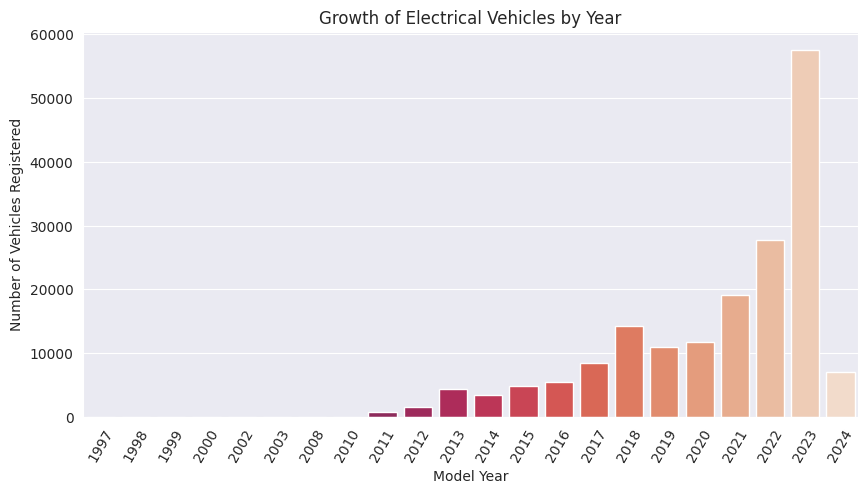

In [10]:
sns.set_style('darkgrid')

# ELECTRIC VEHICLE ADOPTION OVER THE YEARS
plt.figure(figsize=(10,5))
adoption_by_model_year=df['Model Year'].value_counts().sort_index()
sns.barplot(x=adoption_by_model_year.index, y=adoption_by_model_year.values, palette='rocket')
plt.title('ELECTRIC VEHICLE ADOPTION OVER THE YEARS')
plt.xlabel('Model Year')
plt.title('Growth of Electrical Vehicles by Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=60)
plt.show()


**TAKE AWAYS**


*  From the above bar chart , the growth of EV adoption is evident. The no: of EVs registered is growing at a slower pace at first and 2017 onwards the rise is rapid. The year 2023 shows a sharp increase in the no: of EVs registered.



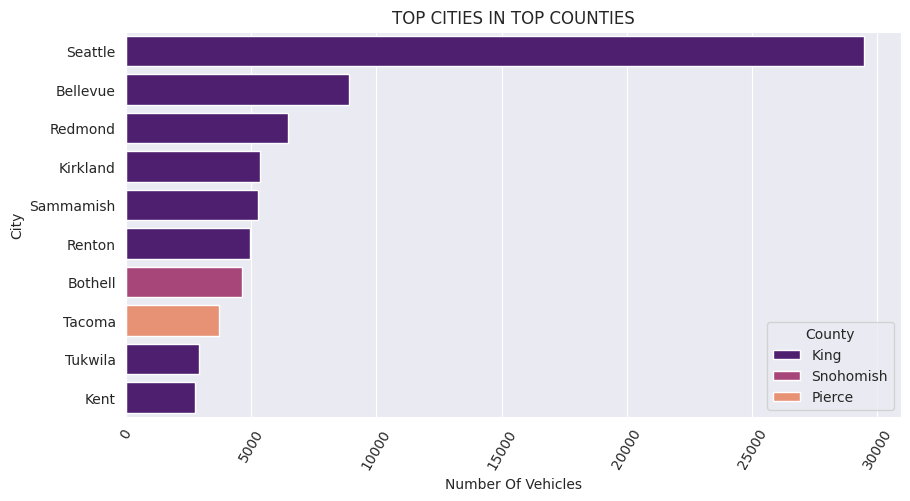

In [11]:
county_distribution=df['County'].value_counts()
top_3=county_distribution.head(3).index
top_3_data=df[df['County'].isin(top_3)]
top_3_county_distribution=top_3_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number Of Vehicles')
top_cities=top_3_county_distribution.head(10)


plt.figure(figsize=(10,5))
sns.barplot(x='Number Of Vehicles',y='City',hue='County',data=top_cities,palette='magma')
plt.title('TOP CITIES IN TOP COUNTIES')
plt.xlabel('Number Of Vehicles')
plt.ylabel('City')
plt.legend(title='County')
plt.xticks(rotation=60)
plt.show()

**TAKE AWAYS**


*  Above graph compares the EVs registered in various cities within the top 3 counties: KING,SNOHOMIS and PIERCE.


*  Seattle city of the King county has the most no: of EVs registered(nearly 30,000) and is followed by Bellevue and Redmond.
*   Bothell city has the most no: of Evs registered in Snohomish County.


*  Tacoma city has the highest EV registrations in Pierce county.







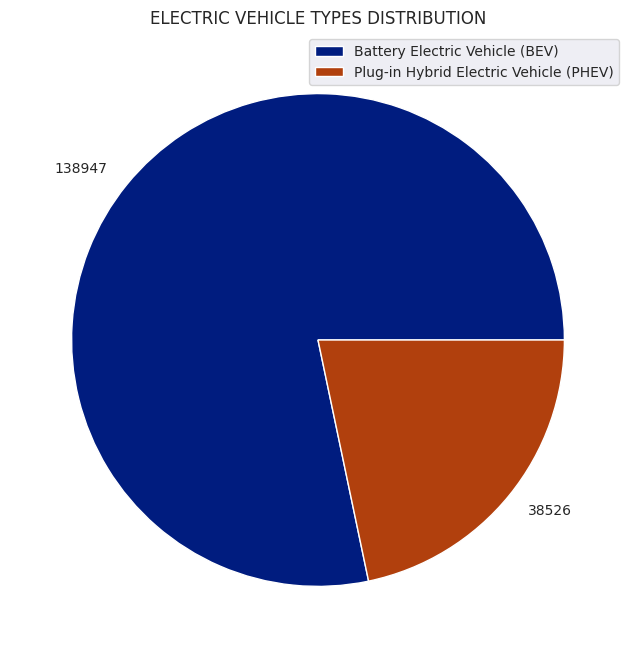

In [20]:
#Electric Vehicle Type
type_distribution=df['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(12,8))
plt.pie(type_distribution,labels=type_distribution.value_counts().index,colors=sns.color_palette('dark'))
plt.legend(labels=type_distribution.index,loc='upper right')
plt.title('ELECTRIC VEHICLE TYPES DISTRIBUTION')
plt.show()

**TAKE AWAYS**


* Above pie chart shows that the demand for the Battery EVs are more than the Plug- in Hybrid EVs.



<ipython-input-13-821a5da23eee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=manufacturer_distribution,palette='colorblind')


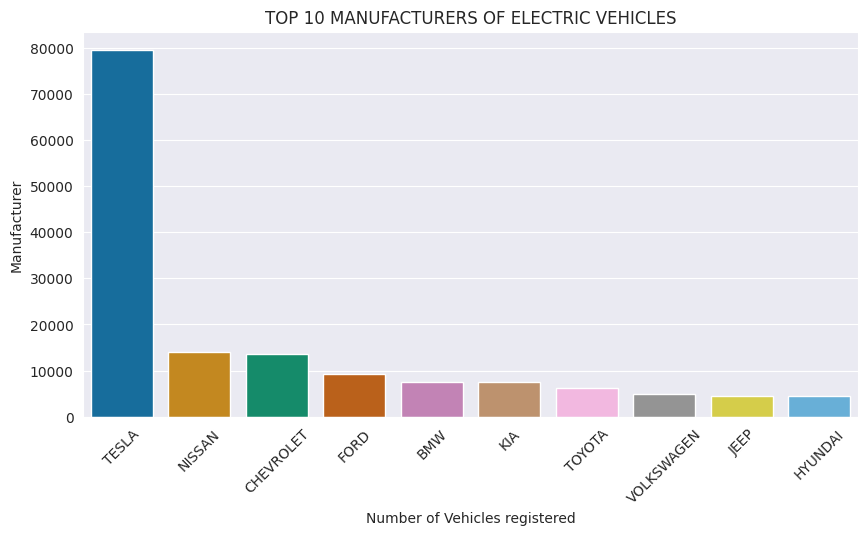

In [13]:
# TOP 10 MANUFACTURERS OF ELECTRIC VEHICLES
manufacturer_distribution=df['Make'].value_counts().head(10)


plt.figure(figsize=(10,5))
sns.barplot(data=manufacturer_distribution,palette='colorblind')
plt.title('TOP 10 MANUFACTURERS OF ELECTRIC VEHICLES')
plt.xlabel('Number of Vehicles registered')
plt.ylabel('Manufacturer')
plt.xticks(rotation=45)
plt.show()

**TAKE AWAYS**


*  The chart shows that, TESLA dominates the EV market with nearly 80,000 registered EVs .


*   It is followed by NISSAN and CHEVERLOT with significantly fewer registerations than TESLA.






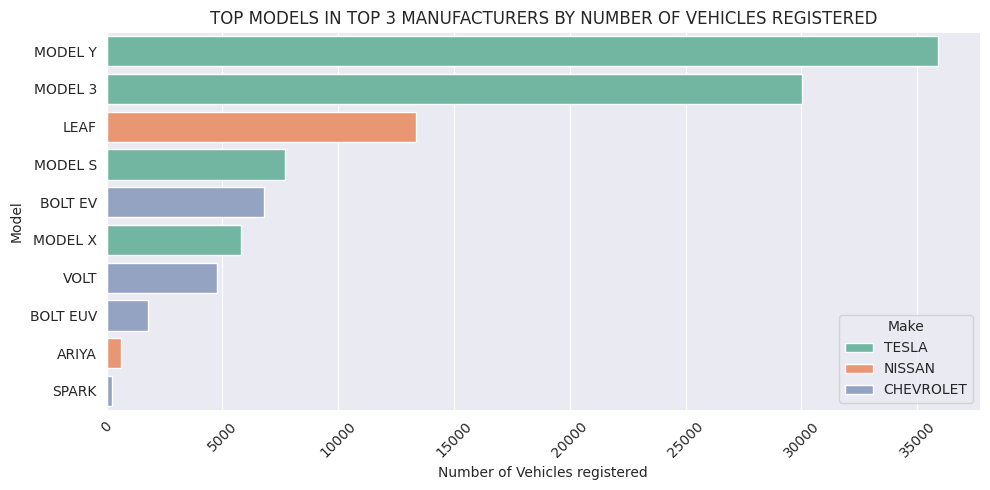

In [14]:
#TOP MODELS IN TOP 3 MANUFACTURERS
top_3_manufacturers=df['Make'].value_counts().head(3).index
top_3_manufacturers_data=df[df['Make'].isin(top_3_manufacturers)]
model_distribution_top_3_makes = top_3_manufacturers_data.groupby(['Make' , 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles').head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=model_distribution_top_3_makes, palette='Set2')
plt.title('TOP MODELS IN TOP 3 MANUFACTURERS BY NUMBER OF VEHICLES REGISTERED')
plt.xlabel('Number of Vehicles registered')
plt.ylabel('Model')
plt.legend(title='Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




**TAKE AWAYS**

   The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. Here are the findings:



*   TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y
having the highest number of registrations.


* NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.  
*   TESLA’s MODEL S and MODEL X also have a significant number of registrations.





*  NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

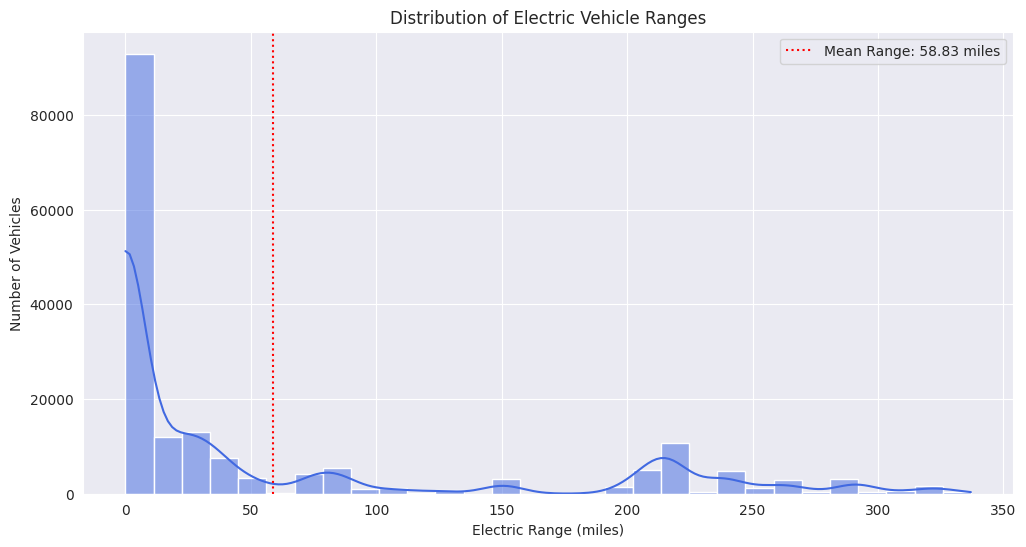

In [15]:
# ELECTRIC RANGE DISTRIBUTION ANALYSIS
plt.figure(figsize=(12, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(df['Electric Range'].mean(), color='red', linestyle=':', label=f'Mean Range: {df["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

**TAKE AWAYS**

The above graph shows the mean electric range. Key observations from the graph include:


*  There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.

*   The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.
*   The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.


*   Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.
It suggests that while there are EVs available with high electric ranges, the average range is skewed lower due to a substantial number of vehicles with shorter ranges.







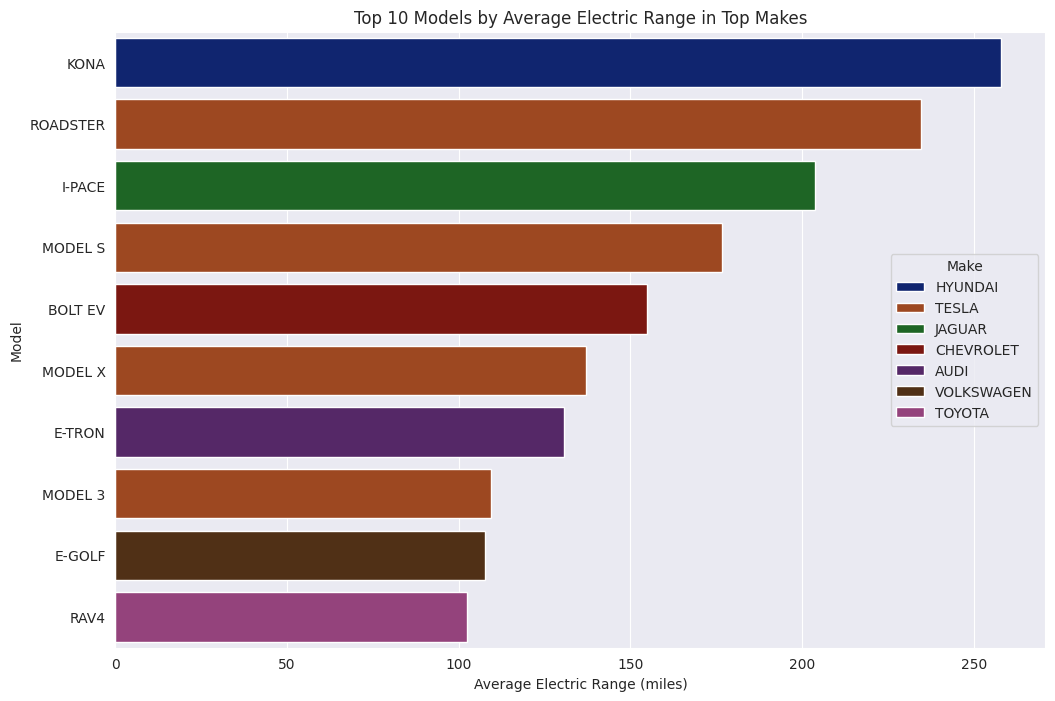

In [16]:
average_range_by_model = df.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="dark")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

**TAKE AWAYS**
The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:




*   
There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.

*   There is a noticeable peak around the year 2020 when the average range reaches its highest point.

*   Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.




# **Estimated Market Size Analysis of Electric Vehicles in the United States**

In [17]:
registration_counts = df['Model Year'].value_counts().sort_index()
registration_counts

,count
Model Year,
1997,1
1998,1
1999,5
2000,7
2002,2
2003,1
2008,19
2010,23
2011,775




*  The dataset provides the number of electric vehicles registered each year from 1997 through 2024.




*   There is a significant jump in the number of EVs from 2022 to 2023.


*  Despite having slight fluctuations in some years, the overall trend shows an increasing pattern .





In [18]:
# Compound Annual Growth Rate (CAGR) calculation and estimation of market trend for next five years



# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = registration_counts[registration_counts.index <= 2023]


# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()

y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.2066611501, 2025: 119653.95934090775, 2026: 181047.21317328632, 2027: 273940.7335817853, 2028: 414496.9933533305, 2029: 627171.2689549965}


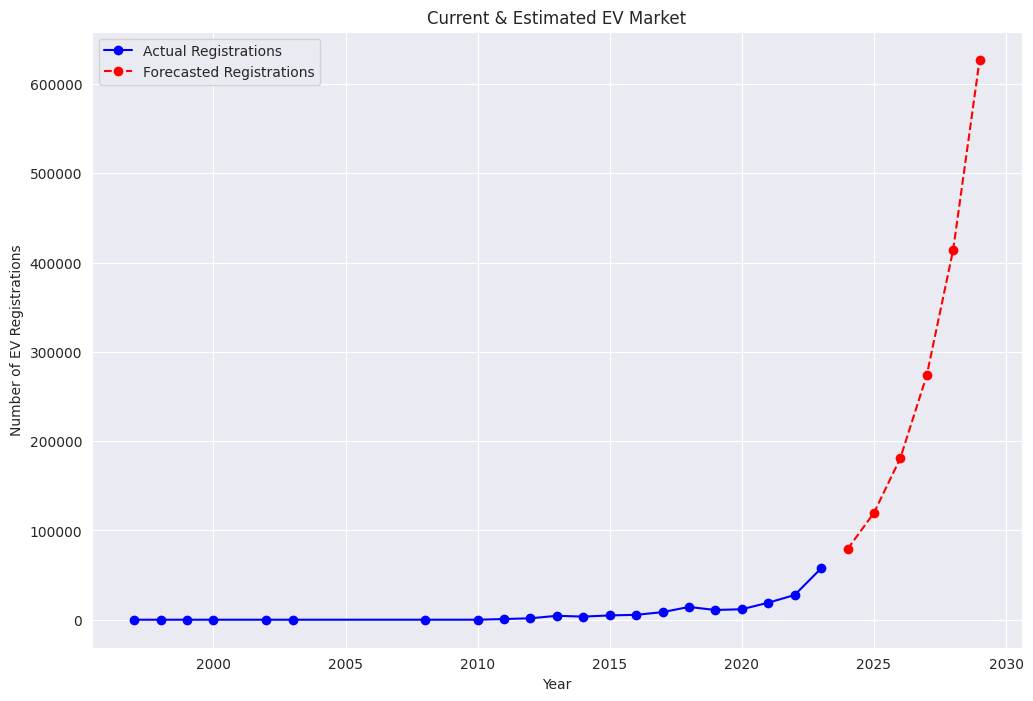

In [19]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

**TAKE AWAYS**
From the above graph, we can see:


*  The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.

*  The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.

# **SUMMARY**

  Given the growing trend in actual EV registrations and the projected acceleration as per the forecast data, we can conclude that the EV market size is expected to expand considerably. The steep increase in forecasted registrations suggests that consumer adoption of EVs is on the rise, and this trend is likely to continue. Overall, the data point towards a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.



